In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

## Seeds dataset


In [2]:
headers = ["area","perim","compactness","kernel_length","kernel_width","ass_coeff","kernel_grove_length","class"]
seeds = pd.read_csv("../../datasets/seeds_dataset.csv",header = None,names=headers)
seeds.tail()

,area,perim,compactness,kernel_length,kernel_width,ass_coeff,kernel_grove_length,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


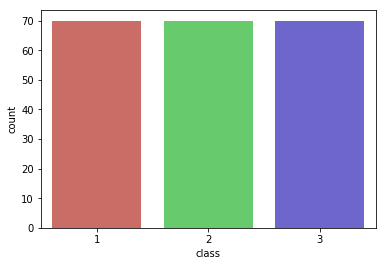

In [7]:
sb.countplot(x='class',data=seeds, palette='hls')

In [8]:
seeds.isnull().sum()

area                   0
perim                  0
compactness            0
kernel_length          0
kernel_width           0
ass_coeff              0
kernel_grove_length    0
class                  0
dtype: int64

In [17]:
X = seeds.iloc[:,0:6].values
y = seeds.iloc[:,7].values

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [21]:
y_pred = LogReg.predict(X_test)

In [22]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[17,  3,  2],
       [ 1, 25,  0],
       [ 0,  0, 15]])

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.94      0.77      0.85        22
          2       0.89      0.96      0.93        26
          3       0.88      1.00      0.94        15

avg / total       0.91      0.90      0.90        63



## CKD Dataset

In [3]:
ckd = pd.read_csv("../../datasets/ckd.csv")
ckd=ckd.iloc[:,2:]
ckd.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
153,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
154,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
155,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
156,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
157,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [59]:
ckd.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [73]:
class_types = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for i in ckd.columns:
    for j in class_types:
        if i==j:
            e = ckd[j].unique()
            ckd[j] = np.where(ckd[j]==e[0],-1,1)

In [78]:
X = ckd.iloc[:,0:23].values
y = ckd.iloc[:,24].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
y_pred = LogReg.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9791666666666666